<a href="https://colab.research.google.com/github/isabela-rossetti/FLAI_10_Competicao_ML/blob/main/Modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **10ª Competição de Machine Learning FLAI**

##**Etapas:**




1. Entender o problema
2. Entender a(s) métrica(s) alvo
3. Entender as variáveis
4. Instalar as bibliotecas necessárias e importar os dados
5. EDA
6. Transformar/limpar variáveis
7. Preparar as variáveis para o modelo
8. Construir o modelo
9. Deploy básico do modelo


##**1. Entender o problema**

A competição visa descobrir quem tem o melhor modelo de classificação para prever se um produto será vendido ou não. Os dados são provenientes de uma empresa fictícia do setor financeiro que opera através de televendas para um de seus produtos.

##**2. Entender a(s) métrica(s) alvo**

O modelo com maior F1 ganha

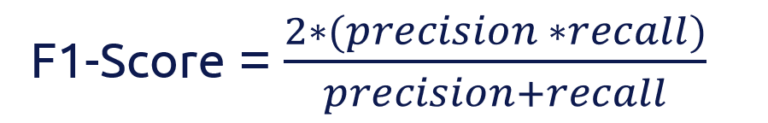

F1-Score é a média harmônica entre o recall e a precisão (precision).  Utilizada quando temos classes desbalanceadas.

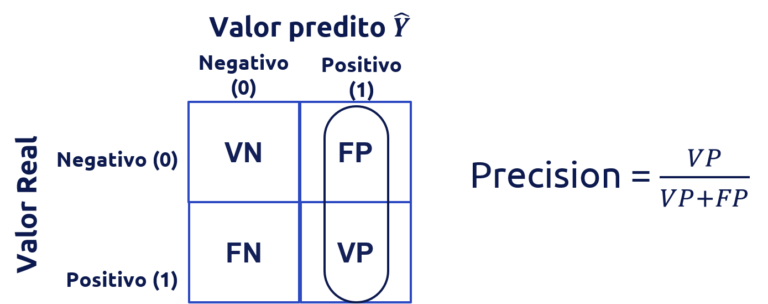

Precision ou precisão, também conhecida como Valor Preditivo Positivo (VPP), é a métrica que traz a informação da quantidade de observações classificadas como positiva (1) que realmente são positiva. Ou seja, entre todas as observações identificadas como positivas (1), quantas foram identificadas corretamente.

Por exemplo: entre os clientes classificados como compradores, quantos foram identificados corretamente.

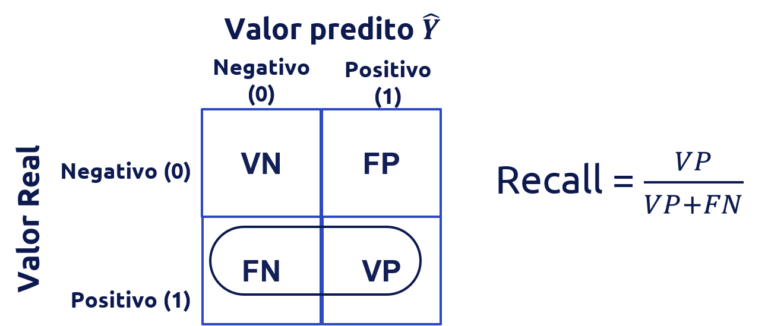

Recall ou Sensibilidade é a proporção dos Verdadeiros Positivos entre todas as observações que realmente são positivas no seu conjunto de dados.  Ou seja, entre todas as observações que são positivas quantas o modelo conseguiu identificar como positiva. Representa a capacidade de um modelo em prever a classe positiva.

Por exemplo: dentre todos os clientes, quantos compraram o produto oferecido modelo conseguiu identificar corretamente.

Fonte: https://www.flai.com.br/juscudilio/qual-a-melhor-metrica-para-avaliar-os-modelos-de-machine-learning/

##**3. Entender as variáveis**

**As variáveis são as seguintes:**<br>
* **idade:** idade da pessoa<br>
* **trabalho:** tipo de ocupação da pessoa<br> 
* **estado civil:** estado civil da pessoa <br>
* **educação:** nível educacional da pessoa <br>
* **atraso:** se o cliente possui crédito em atraso <br>
* **casa:** se o cliente possui casa própria <br>
* **empréstimo:** se o cliente possui um empréstimo pessoal <br>
* **contato:** tipo de contato feito com o cliente <br>
* **mês:** mês em que o último contato foi feito <br>
* **dia:** dia da semana em que o último contato foi feito <br>
* **duração:** tipo de duração da ligação no último contato <br>
* **ncontatos:** número de contatos que o cliente teve durante a campanha atual <br>
* **anterior:** número de contatos que o cliente teve em campanhas anteriores <br>
* **produto:** se o produto foi vendido ou não.




## **4. Instalação das bibliotecas necessárias e Importação dos dados**

In [ ]:
pip install sweetviz

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import sweetviz as sv


In [3]:
url_treino = 'https://raw.githubusercontent.com/isabela-rossetti/FLAI_10_Competicao_ML/main/treino.csv'
url_teste = 'https://raw.githubusercontent.com/isabela-rossetti/FLAI_10_Competicao_ML/main/teste.csv'

# datasets originais
treino_original =  pd.read_csv(url_treino)
teste_original =  pd.read_csv(url_teste)

# cópia dos datasets
treino = treino_original.copy()
teste = teste_original.copy()

In [4]:
treino.head(5)

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,produto
0,36,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,não
1,32,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,não
2,49,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,não
3,28,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,não
4,31,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,sim


In [5]:
teste.head(5)

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior
0,33,trabalhador manual,casado(a),ensino médio,NaN,sim,não,telefone fixo,maio,sexta-feira,curta,1,nenhum
1,41,escritório,casado(a),graduação,NaN,sim,não,telefone fixo,maio,segunda-feira,média,1,nenhum
2,42,terceirizados,solteiro(a),ensino médio,NaN,sim,não,telefone móvel,novembro,quinta-feira,longa,1,nenhum
3,34,empreendedor,casado(a),básico,NaN,sim,sim,telefone fixo,novembro,segunda-feira,média,1,nenhum
4,34,trabalhador manual,casado(a),básico,não,sim,não,telefone móvel,julho,quinta-feira,curta,14,nenhum


In [6]:
print(treino.shape)
print(teste.shape)

(5700, 14)
(3300, 13)


### **Renomeando as colunas com acento e espaço**

In [7]:
#renomeando colunas

treino.rename(columns={'estado civil': 'estado_civil', 'educação': 'educacao', 'empréstimo': 'emprestimo', 'mês': 'mes', 'duração': 'duracao'}, inplace = True)
teste.rename(columns={'estado civil': 'estado_civil', 'educação': 'educacao', 'empréstimo': 'emprestimo', 'mês': 'mes', 'duração': 'duracao'}, inplace = True)

In [8]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idade         5700 non-null   int64 
 1   trabalho      5477 non-null   object
 2   estado_civil  5687 non-null   object
 3   educacao      5457 non-null   object
 4   atraso        4677 non-null   object
 5   casa          5562 non-null   object
 6   emprestimo    5562 non-null   object
 7   contato       5700 non-null   object
 8   mes           5700 non-null   object
 9   dia           5700 non-null   object
 10  duracao       5700 non-null   object
 11  ncontatos     5700 non-null   int64 
 12  anterior      5700 non-null   object
 13  produto       5700 non-null   object
dtypes: int64(2), object(12)
memory usage: 623.6+ KB


In [9]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idade         3300 non-null   int64 
 1   trabalho      3183 non-null   object
 2   estado_civil  3295 non-null   object
 3   educacao      3157 non-null   object
 4   atraso        2711 non-null   object
 5   casa          3218 non-null   object
 6   emprestimo    3218 non-null   object
 7   contato       3300 non-null   object
 8   mes           3300 non-null   object
 9   dia           3300 non-null   object
 10  duracao       3300 non-null   object
 11  ncontatos     3300 non-null   int64 
 12  anterior      3300 non-null   object
dtypes: int64(2), object(11)
memory usage: 335.3+ KB


## **5. EDA**

In [10]:
#observando os valores contidos nas variáveis
for col in treino.columns:
    print(f'{col:30s}\t{treino[col].unique()}')

idade                         	[36 32 49 28 31 56 35 52 55 51 58 44 23 25 67 42 45 61 39 27 30 57 43 37
 34 80 54 38 59 50 33 47 60 48 19 41 40 53 29 90 78 20 46 62 75 26 63 69
 72 76 81 24 21 64 83 65 79 22 68 71 84 89 74 77 66 87 70 73 82 99 86 92
 93]
trabalho                      	['escritório' 'trabalhador manual' 'especialista' 'do lar' 'empreendedor'
 'terceirizados' 'aposentado' 'gerência' 'desempregado' nan]
estado_civil                  	['casado(a)' 'solteiro(a)' 'divorciado(a)' nan]
educacao                      	['ensino médio' 'básico' nan 'ensino técnico' 'graduação']
atraso                        	['não' nan]
casa                          	['não' 'sim' nan]
emprestimo                    	['não' nan 'sim']
contato                       	['telefone fixo' 'telefone móvel']
mes                           	['junho' 'julho' 'maio' 'outubro' 'novembro' 'agosto' 'março' 'abril'
 'dezembro' 'setembro']
dia                           	['quinta-feira' 'terça-feira' 'segunda-feira' '

**Verificando dados faltantes**

In [11]:
for col in treino.columns:
    print(
        col,
        '\n',
        treino[col].value_counts(normalize=False, dropna=False),
        '\n',
        '----------------------'
    )

idade 
 32    283
34    274
37    261
35    255
31    253
     ... 
90      2
99      2
75      2
92      1
93      1
Name: idade, Length: 73, dtype: int64 
 ----------------------
trabalho 
 escritório            1530
trabalhador manual    1174
especialista           905
terceirizados          509
gerência               421
empreendedor           356
aposentado             281
NaN                    223
desempregado           156
do lar                 145
Name: trabalho, dtype: int64 
 ----------------------
estado_civil 
 casado(a)        3315
solteiro(a)      1760
divorciado(a)     612
NaN                13
Name: estado_civil, dtype: int64 
 ----------------------
educacao 
 graduação         1790
básico            1679
ensino médio      1273
ensino técnico     715
NaN                243
Name: educacao, dtype: int64 
 ----------------------
atraso 
 não    4677
NaN    1023
Name: atraso, dtype: int64 
 ----------------------
casa 
 sim    2989
não    2573
NaN     138
Name: casa, dty

In [12]:
print('Soma dos dados de treino faltantes: {}' .format(treino.isnull().sum()))
print('Soma dos dados de teste faltantes: {}' .format(teste.isnull().sum()))
# variáveis com dados faltantes: atraso, educação, trabalho, casa, empréstimo, estado civil

Soma dos dados de treino faltantes: idade              0
trabalho         223
estado_civil      13
educacao         243
atraso          1023
casa             138
emprestimo       138
contato            0
mes                0
dia                0
duracao            0
ncontatos          0
anterior           0
produto            0
dtype: int64
Soma dos dados de teste faltantes: idade             0
trabalho        117
estado_civil      5
educacao        143
atraso          589
casa             82
emprestimo       82
contato           0
mes               0
dia               0
duracao           0
ncontatos         0
anterior          0
dtype: int64


**Substituindo os dados faltantes pelos valores mais frequentes**

- identificando os valores mais frequentes nas seguintes variáveis: trabalho, atraso, educação, casa, empréstimo, estado civil

In [23]:
treino.select_dtypes(include='object').describe()

,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,anterior,produto
count,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700
unique,9,3,4,2,2,2,2,10,5,3,3,2
top,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,longa,nenhum,não
freq,1753,3328,2033,4677,3127,4831,3858,1701,1180,2182,4638,3804


In [24]:
teste.select_dtypes(include='object').describe()

,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,anterior
count,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
unique,9,3,4,2,2,2,2,10,5,3,3
top,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,média,nenhum
freq,997,1988,1163,2711,1819,2820,2258,995,718,1282,2680


In [25]:
# a variável 'atraso' só possui um valor, portanto os demais serão preenchidos com 'desconhecido'; 
# para as outras variáveis, o valor mais frequente foi o escolhido

treino.trabalho.fillna('escritório', inplace=True)
treino.atraso.fillna('desconhecido', inplace=True)
treino.educacao.fillna('graduação', inplace=True)
treino.casa.fillna('sim', inplace=True)
treino.emprestimo.fillna('não', inplace=True)
treino.estado_civil.fillna('casado(a)', inplace=True)

teste.trabalho.fillna('escritório', inplace=True)
teste.atraso.fillna('desconhecido', inplace=True)
teste.educacao.fillna('graduação', inplace=True)
teste.casa.fillna('sim', inplace=True)
teste.emprestimo.fillna('não', inplace=True)
teste.estado_civil.fillna('casado(a)', inplace=True)

In [26]:
print(treino.isnull().sum())
print(teste.isnull().sum())

idade           0
trabalho        0
estado_civil    0
educacao        0
atraso          0
casa            0
emprestimo      0
contato         0
mes             0
dia             0
duracao         0
ncontatos       0
anterior        0
produto         0
dtype: int64
idade           0
trabalho        0
estado_civil    0
educacao        0
atraso          0
casa            0
emprestimo      0
contato         0
mes             0
dia             0
duracao         0
ncontatos       0
anterior        0
dtype: int64


In [27]:
treino.select_dtypes(include='object').describe()

,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,anterior,produto
count,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700
unique,9,3,4,2,2,2,2,10,5,3,3,2
top,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,longa,nenhum,não
freq,1753,3328,2033,4677,3127,4831,3858,1701,1180,2182,4638,3804


In [28]:
teste.select_dtypes(include='object').describe()

,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,anterior
count,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
unique,9,3,4,2,2,2,2,10,5,3,3
top,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,média,nenhum
freq,997,1988,1163,2711,1819,2820,2258,995,718,1282,2680


**Verificando o ganho de informações das variáveis**

In [ ]:
!pip install info_gain
from info_gain import info_gain

In [29]:
for col in treino.columns:
    print(
        col,
        '\n',
        info_gain.info_gain(treino['produto'], treino[col]),
        '\n',
        '----------------------'
    )

idade 
 0.027178309024285974 
 ----------------------
trabalho 
 0.016569422707114034 
 ----------------------
estado_civil 
 0.0030082457880901137 
 ----------------------
educacao 
 0.0050013664173151895 
 ----------------------
atraso 
 0.012355504752910473 
 ----------------------
casa 
 0.00040190060492384383 
 ----------------------
emprestimo 
 0.0006333228144611569 
 ----------------------
contato 
 0.031403764079633856 
 ----------------------
mes 
 0.05394571736656084 
 ----------------------
dia 
 0.0015650257000537904 
 ----------------------
duracao 
 0.11845692663301421 
 ----------------------
ncontatos 
 0.00815045131777048 
 ----------------------
anterior 
 0.04215873655336344 
 ----------------------
produto 
 0.6360266407980966 
 ----------------------


**Observando os gráficos**

In [39]:
#idade
px.histogram(
  data_frame = treino, 
  x="idade", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [40]:
#trabalho
px.histogram(
  data_frame = treino, 
  x="trabalho", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [41]:
#estado_civil
px.histogram(
  data_frame = treino, 
  x="estado_civil", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [42]:
#educacao
px.histogram(
  data_frame = treino, 
  x="educacao", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [43]:
#atraso
px.histogram(
  data_frame = treino, 
  x="atraso", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [44]:
# casa
px.histogram(
  data_frame = treino, 
  x="casa", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [45]:
#emprestimo
px.histogram(
  data_frame = treino, 
  x="emprestimo", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [46]:
# contato
px.histogram(
  data_frame = treino, 
  x="contato", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [47]:
# mes
px.histogram(
  data_frame = treino, 
  x="mes", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [48]:
# dia
px.histogram(
  data_frame = treino, 
  x="dia", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [49]:
# duracao
px.histogram(
  data_frame = treino, 
  x="duracao", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [50]:
# ncontatos
px.histogram(
  data_frame = treino, 
  x="ncontatos", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

In [51]:
# anterior
px.histogram(
  data_frame = treino, 
  x="anterior", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

## **6. Transformar / limpar variáveis**


Observando outliers e Categorizando as variáveis numéricas

In [54]:
treino.describe()

,idade,ncontatos
count,5700.000000,5700.000000
mean,40.976842,2.457719
std,11.217724,2.585706
min,19.000000,1.000000
25%,33.000000,1.000000
50%,38.000000,2.000000
75%,48.000000,3.000000
max,99.000000,42.000000


In [55]:
teste.describe()

,idade,ncontatos
count,3300.000000,3300.000000
mean,41.496364,2.486667
std,11.365873,2.700489
min,18.000000,1.000000
25%,33.000000,1.000000
50%,39.000000,2.000000
75%,49.000000,3.000000
max,89.000000,35.000000


**variável: idade**

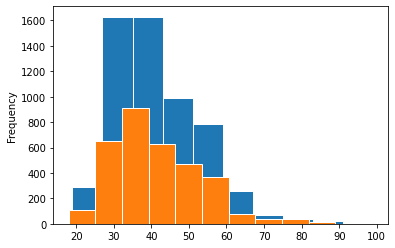

In [56]:
treino['idade'].plot(kind = 'hist', edgecolor = 'white');
teste['idade'].plot(kind = 'hist', edgecolor = 'white');

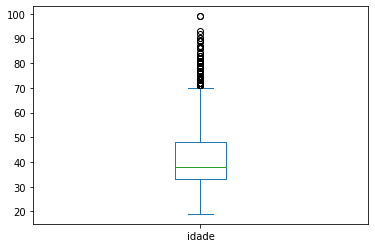

In [57]:
treino['idade'].plot(kind = 'box');

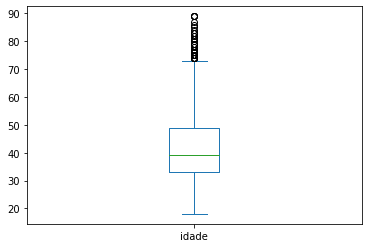

In [40]:
teste['idade'].plot(kind = 'box');

In [45]:
#categorizando
print(treino['idade'].describe())
print(teste['idade'].describe())

count    5700.000000
mean       40.945263
std        11.090995
min        19.000000
25%        33.000000
50%        38.000000
75%        48.000000
max        81.000000
Name: idade, dtype: float64
count    3300.000000
mean       41.478182
std        11.297641
min        18.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        81.000000
Name: idade, dtype: float64


Faixa de idade que compraram produto: 19 a 30 anos e 60+ <br>
36 a 58 -> maioria não compra

In [58]:
def auxiliar(x):
    if x < 35:
        return '19-34'
    elif x < 60:
        return '35-59'
    else:
        return '60+'

treino['idade'] = treino['idade'].apply(auxiliar)
treino['idade'].head()

0    35-59
1    19-34
2    35-59
3    19-34
4    19-34
Name: idade, dtype: object

In [59]:
# conferindo as primeiras linhas
treino_original['idade'].head(5)

0    36
1    32
2    49
3    28
4    31
Name: idade, dtype: int64

In [60]:
def auxiliar(x):
    if x < 35:
        return '19-34'
    elif x < 60:
        return '35-59'
    else:
        return '60+'

teste['idade'] = teste['idade'].apply(auxiliar)
teste['idade'].head()

0    19-34
1    35-59
2    35-59
3    19-34
4    19-34
Name: idade, dtype: object

In [61]:
teste_original['idade'].head(5)

0    33
1    41
2    42
3    34
4    34
Name: idade, dtype: int64

In [62]:
px.histogram(
  data_frame = treino, 
  x="idade", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

**variável: ncontatos**

In [50]:
treino['ncontatos'].describe()

count    5700.000000
mean        2.457719
std         2.585706
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        42.000000
Name: ncontatos, dtype: float64

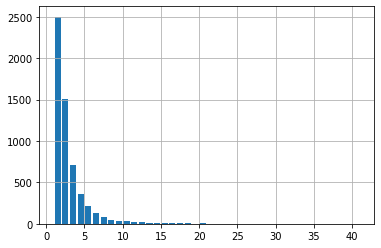

In [51]:
treino['ncontatos'].hist(bins=np.arange(1, 42, 1), rwidth=.8)

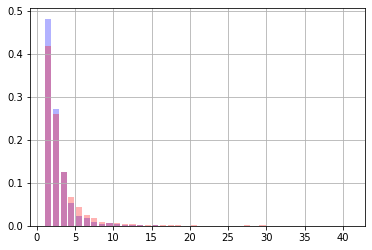

In [52]:
treino.loc[treino.produto==1]['ncontatos'].hist(bins=np.arange(1, 42, 1), rwidth=.8, color='b', alpha=.3, density=True)
treino.loc[treino.produto==0]['ncontatos'].hist( bins=np.arange(1, 42, 1), rwidth=.8, color='r', alpha=.3, density=True)

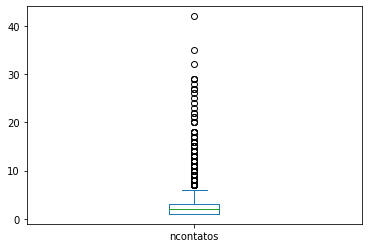

In [53]:
treino['ncontatos'].plot(kind = 'box');

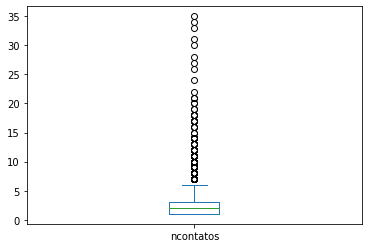

In [54]:
teste['ncontatos'].plot(kind = 'box');

In [60]:
#categorizando
print(treino['ncontatos'].describe())
print(teste['ncontatos'].describe())

count    5700.000000
mean        2.264211
std         1.643531
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: ncontatos, dtype: float64
count    3300.000000
mean        2.270303
std         1.648103
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: ncontatos, dtype: float64


In [69]:
def auxiliar(x):
    if x < 3:
        return '1-2'
    elif x < 7:
        return '3-6'
    else:
        return '7+'

treino['ncontatos'] = treino['ncontatos'].apply(auxiliar)
treino['ncontatos'].head()

0    1-2
1    3-6
2    1-2
3    1-2
4    1-2
Name: ncontatos, dtype: object

In [70]:
treino_original['ncontatos'].head()

0    1
1    4
2    1
3    1
4    1
Name: ncontatos, dtype: int64

In [71]:
def auxiliar(x):
    if x < 3:
        return '1-2'
    elif x < 7:
        return '3-6'
    else:
        return '7+'

teste['ncontatos'] = teste['ncontatos'].apply(auxiliar)
teste['ncontatos'].head()

0    1-2
1    1-2
2    1-2
3    1-2
4     7+
Name: ncontatos, dtype: object

In [72]:
teste_original['ncontatos'].head()

0     1
1     1
2     1
3     1
4    14
Name: ncontatos, dtype: int64

In [73]:
px.histogram(
  data_frame = treino, 
  x="ncontatos", 
  nbins=50,
  histnorm='probability',
  color="produto",
   marginal="box"
)

**As demais variáveis são categóricas.**<br>
**Categóricas nominais:** trabalho, estado_civil, atraso, casa, empréstimo, contato e produto <br>
**Categóricas ordinais:** educação, mês, dia, duração e anterior

In [74]:
treino.select_dtypes(include='object').describe()

,idade,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,ncontatos,anterior,produto
count,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700
unique,3,9,3,4,2,2,2,2,10,5,3,3,3,2
top,35-59,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,longa,1-2,nenhum,não
freq,3461,1753,3328,2033,4677,3127,4831,3858,1701,1180,2182,4008,4638,3804


In [75]:
teste.select_dtypes(include='object').describe()

,idade,trabalho,estado_civil,educacao,atraso,casa,emprestimo,contato,mes,dia,duracao,ncontatos,anterior
count,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
unique,3,9,3,4,2,2,2,2,10,5,3,3,3
top,35-59,escritório,casado(a),graduação,não,sim,não,telefone móvel,maio,quinta-feira,média,1-2,nenhum
freq,2044,997,1988,1163,2711,1819,2820,2258,995,718,1282,2294,2680


In [76]:
# Reduzindo as categorias da variável trabalho

tramap = { 'escritório': 'escritório',
           'trabalhador manual': 'manual',
           'especialista': 'outros',
           'terceirizados': 'terceirizados',
           'gerência': 'gerência',
           'empreendedor': 'outros',
           'aposentado': 'aposentado',
           'desempregado': 'outros',
           'do lar': 'outros'}

treino['trabalho'] = treino['trabalho'].map(tramap) 
teste['trabalho'] = teste['trabalho'].map(tramap) 

## **7. Preparar as variáveis para o modelo**

**Seleção das variáveis para o modelo**

In [79]:
treino.columns

Index(['idade', 'trabalho', 'estado_civil', 'educacao', 'atraso', 'casa',
       'emprestimo', 'contato', 'mes', 'dia', 'duracao', 'ncontatos',
       'anterior', 'produto'],
      dtype='object')

In [80]:
treino = treino.drop(columns=['estado_civil', 'educacao', 'casa', 'emprestimo', 'dia', 'ncontatos'])

In [81]:
treino.columns

Index(['idade', 'trabalho', 'atraso', 'contato', 'mes', 'duracao', 'anterior',
       'produto'],
      dtype='object')

## **8. Construir o modelo**

In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install numba==0.53

In [78]:
from pycaret.classification import *

In [82]:
classificacao = setup(data = treino, target = 'produto', normalize = True, fix_imbalance= True, session_id = 15122022)

,Description,Value
0,session_id,15122022
1,Target,produto
2,Target Type,Binary
3,Label Encoded,"não: 0, sim: 1"
4,Original Data,"(5700, 8)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='produto',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

In [83]:
melhores = compare_models(n_select = 3, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7889,0.8801,0.8298,0.6434,0.7245,0.5579,0.5702,0.331
ridge,Ridge Classifier,0.7889,0.0000,0.8178,0.6460,0.7216,0.5554,0.5657,0.059
lda,Linear Discriminant Analysis,0.7889,0.8698,0.8178,0.6460,0.7216,0.5554,0.5657,0.067
lr,Logistic Regression,0.7914,0.8731,0.8043,0.6532,0.7207,0.5572,0.5651,0.360
svm,SVM - Linear Kernel,0.7859,0.0000,0.8261,0.6399,0.7200,0.5513,0.5648,0.075
lightgbm,Light Gradient Boosting Machine,0.7864,0.8733,0.8029,0.6463,0.7156,0.5479,0.5567,0.183
ada,Ada Boost Classifier,0.7934,0.8702,0.7714,0.6650,0.7141,0.5538,0.5577,0.191
rf,Random Forest Classifier,0.7791,0.8545,0.7541,0.6472,0.6956,0.5241,0.5289,0.395
et,Extra Trees Classifier,0.7734,0.8338,0.7129,0.6484,0.6780,0.5040,0.5064,0.401
knn,K Neighbors Classifier,0.7684,0.8341,0.7121,0.6395,0.6732,0.4948,0.4971,0.149


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15122022, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=15122022,
                solver='auto', t

In [84]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7669,0.8534,0.7836,0.6213,0.6931,0.5092,0.5181
1,0.7845,0.8673,0.7985,0.6446,0.7133,0.5438,0.5518
2,0.7995,0.8843,0.8657,0.6517,0.7436,0.5843,0.6002
3,0.7744,0.8818,0.8731,0.6158,0.7222,0.5417,0.5652
4,0.7845,0.8758,0.8195,0.6374,0.7171,0.5474,0.5587
5,0.8145,0.9034,0.8271,0.6832,0.7483,0.6036,0.6105
6,0.8045,0.8988,0.8346,0.6647,0.7400,0.5866,0.5963
7,0.7945,0.8759,0.8647,0.6425,0.7372,0.5744,0.5915
8,0.7870,0.8832,0.8045,0.6446,0.7157,0.5487,0.5573


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15122022, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [85]:
gbc_tunado = tune_model(gbc, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7644,0.8574,0.8284,0.6099,0.7025,0.5148,0.5314
1,0.7794,0.8657,0.7910,0.6386,0.7067,0.5332,0.5410
2,0.7970,0.8806,0.8582,0.6497,0.7395,0.5784,0.5934
3,0.7895,0.8794,0.8731,0.6359,0.7358,0.5679,0.5877
4,0.7769,0.8756,0.8195,0.6264,0.7101,0.5340,0.5468
5,0.8271,0.9039,0.8722,0.6905,0.7708,0.6349,0.6461
6,0.8145,0.8965,0.8421,0.6788,0.7517,0.6064,0.6154
7,0.7970,0.8738,0.8647,0.6461,0.7395,0.5789,0.5954
8,0.8020,0.8844,0.8195,0.6646,0.7340,0.5790,0.5871


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15122022, subsample=0.3, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [86]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.8414,0.8060,0.6316,0.7082,0.5319,0.5423
1,0.7744,0.8534,0.7687,0.6358,0.6959,0.5192,0.5251
2,0.7995,0.8681,0.8582,0.6534,0.7419,0.5829,0.5974
3,0.7970,0.8759,0.8657,0.6480,0.7412,0.5798,0.5963
4,0.7895,0.8700,0.8045,0.6485,0.7181,0.5532,0.5614
5,0.8221,0.8978,0.8496,0.6890,0.7609,0.6217,0.6303
6,0.8020,0.8879,0.8120,0.6667,0.7322,0.5775,0.5846
7,0.7870,0.8677,0.8271,0.6395,0.7213,0.5534,0.5654
8,0.7945,0.8833,0.8045,0.6564,0.7230,0.5623,0.5696


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [87]:
lda_tunado = tune_model(lda, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.8411,0.8060,0.6316,0.7082,0.5319,0.5423
1,0.7769,0.8528,0.7761,0.6380,0.7003,0.5254,0.5318
2,0.7995,0.8672,0.8582,0.6534,0.7419,0.5829,0.5974
3,0.7945,0.8760,0.8582,0.6461,0.7372,0.5739,0.5895
4,0.7895,0.8700,0.8045,0.6485,0.7181,0.5532,0.5614
5,0.8221,0.8973,0.8496,0.6890,0.7609,0.6217,0.6303
6,0.8020,0.8874,0.8120,0.6667,0.7322,0.5775,0.5846
7,0.7870,0.8676,0.8271,0.6395,0.7213,0.5534,0.5654
8,0.7945,0.8831,0.8045,0.6564,0.7230,0.5623,0.5696


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [88]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7794,0.8459,0.8060,0.6353,0.7105,0.5364,0.5463
1,0.7744,0.8579,0.7612,0.6375,0.6939,0.5175,0.5226
2,0.8070,0.8698,0.8209,0.6748,0.7407,0.5894,0.5965
3,0.7920,0.8757,0.8582,0.6425,0.7348,0.5694,0.5856
4,0.7870,0.8743,0.7970,0.6463,0.7138,0.5471,0.5547
5,0.8170,0.9005,0.8271,0.6875,0.7509,0.6082,0.6147
6,0.8095,0.8927,0.8045,0.6815,0.7379,0.5899,0.5949
7,0.7970,0.8672,0.8045,0.6605,0.7254,0.5668,0.5738
8,0.7895,0.8843,0.7820,0.6541,0.7123,0.5484,0.5538


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=15122022, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [89]:
lr_tunado = tune_model(lr, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7820,0.8460,0.8060,0.6391,0.7129,0.5409,0.5503
1,0.7744,0.8579,0.7612,0.6375,0.6939,0.5175,0.5226
2,0.8070,0.8699,0.8209,0.6748,0.7407,0.5894,0.5965
3,0.7920,0.8756,0.8582,0.6425,0.7348,0.5694,0.5856
4,0.7870,0.8743,0.7970,0.6463,0.7138,0.5471,0.5547
5,0.8170,0.9007,0.8271,0.6875,0.7509,0.6082,0.6147
6,0.8095,0.8927,0.8045,0.6815,0.7379,0.5899,0.5949
7,0.7970,0.8669,0.8045,0.6605,0.7254,0.5668,0.5738
8,0.7895,0.8843,0.7820,0.6541,0.7123,0.5484,0.5538


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.205, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=15122022, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [90]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7719,0.8525,0.7761,0.6303,0.6957,0.5164,0.5236
1,0.7794,0.8624,0.7612,0.6456,0.6986,0.5266,0.5310
2,0.7820,0.8661,0.8358,0.6328,0.7203,0.5471,0.5614
3,0.7694,0.8720,0.8209,0.6180,0.7051,0.5219,0.5361
4,0.7820,0.8744,0.7895,0.6402,0.7071,0.5364,0.5439
5,0.8120,0.8982,0.7895,0.6908,0.7368,0.5917,0.5948
6,0.8145,0.8906,0.8195,0.6855,0.7466,0.6022,0.6081
7,0.7769,0.8639,0.8195,0.6264,0.7101,0.5340,0.5468
8,0.7995,0.8795,0.7970,0.6667,0.7260,0.5699,0.5755


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=15122022, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [91]:
lightgbm_tunado = tune_model(lightgbm, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7569,0.8466,0.8284,0.6000,0.6959,0.5019,0.5200
1,0.7794,0.8601,0.8358,0.6292,0.7179,0.5427,0.5575
2,0.7845,0.8772,0.9179,0.6212,0.7410,0.5679,0.5997
3,0.7694,0.8868,0.8955,0.6061,0.7229,0.5377,0.5679
4,0.7644,0.8695,0.8872,0.5990,0.7152,0.5268,0.5565
5,0.8221,0.8970,0.9098,0.6722,0.7732,0.6321,0.6517
6,0.7945,0.8932,0.9023,0.6349,0.7453,0.5816,0.6069
7,0.7744,0.8729,0.8872,0.6114,0.7239,0.5439,0.5710
8,0.7995,0.8749,0.8797,0.6464,0.7452,0.5862,0.6052


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=240, n_jobs=-1, num_leaves=20, objective=None,
               random_state=15122022, reg_alpha=0.05, reg_lambda=0.0001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [92]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7569,0.8313,0.7463,0.6135,0.6734,0.4827,0.4886
1,0.7794,0.8564,0.7164,0.6575,0.6857,0.5163,0.5174
2,0.7719,0.8422,0.7687,0.6319,0.6936,0.5147,0.5210
3,0.7644,0.8571,0.7761,0.6190,0.6887,0.5031,0.5114
4,0.7794,0.8578,0.7744,0.6398,0.7007,0.5286,0.5346
5,0.7945,0.8814,0.7143,0.6835,0.6985,0.5428,0.5431
6,0.7845,0.8690,0.7368,0.6577,0.6950,0.5292,0.5312
7,0.7719,0.8483,0.7895,0.6250,0.6977,0.5185,0.5276
8,0.8070,0.8550,0.7218,0.7059,0.7138,0.5682,0.5683


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=15122022,
                       verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [93]:
rf_tunado = tune_model(rf, optimize = 'F1', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7594,0.8449,0.8134,0.6056,0.6943,0.5028,0.5177
1,0.7794,0.8517,0.8284,0.6307,0.7161,0.5412,0.5546
2,0.7895,0.8655,0.8433,0.6420,0.7290,0.5620,0.5760
3,0.7870,0.8697,0.8806,0.6310,0.7352,0.5650,0.5870
4,0.7769,0.8675,0.8195,0.6264,0.7101,0.5340,0.5468
5,0.8045,0.8889,0.8496,0.6608,0.7434,0.5895,0.6016
6,0.7895,0.8827,0.8271,0.6433,0.7237,0.5579,0.5694
7,0.7870,0.8685,0.8647,0.6319,0.7302,0.5611,0.5800
8,0.7945,0.8762,0.8195,0.6527,0.7267,0.5654,0.5748


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=-1, oob_score=False, random_state=15122022,
                       verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [94]:
rf_tunado2 = tune_model(rf, optimize = 'F1', n_iter = 40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7669,0.8554,0.8433,0.6108,0.7085,0.5224,0.5413
1,0.7694,0.8591,0.7836,0.6250,0.6954,0.5136,0.5221
2,0.7995,0.8816,0.8731,0.6500,0.7452,0.5857,0.6031
3,0.7644,0.8819,0.8731,0.6031,0.7134,0.5245,0.5505
4,0.8020,0.8802,0.8346,0.6607,0.7375,0.5820,0.5923
5,0.8246,0.8988,0.8496,0.6933,0.7635,0.6263,0.6345
6,0.8070,0.8973,0.8797,0.6573,0.7524,0.5997,0.6168
7,0.7870,0.8781,0.8797,0.6290,0.7335,0.5641,0.5862
8,0.7945,0.8792,0.8195,0.6527,0.7267,0.5654,0.5748


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15122022, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [97]:
modelo_combinado = blend_models(melhores, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.0,0.8060,0.6316,0.7082,0.5319,0.5423
1,0.7744,0.0,0.7687,0.6358,0.6959,0.5192,0.5251
2,0.7995,0.0,0.8582,0.6534,0.7419,0.5829,0.5974
3,0.7970,0.0,0.8657,0.6480,0.7412,0.5798,0.5963
4,0.7895,0.0,0.8045,0.6485,0.7181,0.5532,0.5614
5,0.8221,0.0,0.8496,0.6890,0.7609,0.6217,0.6303
6,0.8020,0.0,0.8120,0.6667,0.7322,0.5775,0.5846
7,0.7870,0.0,0.8271,0.6395,0.7213,0.5534,0.5654
8,0.7945,0.0,0.8045,0.6564,0.7230,0.5623,0.5696


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
       

In [98]:
modelo_stack = stack_models(melhores)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7644,0.8511,0.7687,0.6205,0.6867,0.5013,0.5087
1,0.7870,0.8699,0.7761,0.6541,0.7099,0.5435,0.5485
2,0.8020,0.8832,0.8507,0.6590,0.7427,0.5860,0.5986
3,0.7769,0.8770,0.8433,0.6243,0.7175,0.5399,0.5566
4,0.7845,0.8794,0.7895,0.6442,0.7095,0.5409,0.5480
5,0.8221,0.9047,0.8195,0.6987,0.7543,0.6162,0.6210
6,0.8045,0.8984,0.8271,0.6667,0.7383,0.5851,0.5938
7,0.8020,0.8741,0.8421,0.6588,0.7393,0.5835,0.5949
8,0.8020,0.8848,0.8120,0.6667,0.7322,0.5775,0.5846


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                     

In [99]:
melhores_tunados = [tune_model(i) for i in melhores]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.8414,0.8060,0.6316,0.7082,0.5319,0.5423
1,0.7744,0.8534,0.7687,0.6358,0.6959,0.5192,0.5251
2,0.7995,0.8679,0.8582,0.6534,0.7419,0.5829,0.5974
3,0.7970,0.8759,0.8657,0.6480,0.7412,0.5798,0.5963
4,0.7895,0.8700,0.8045,0.6485,0.7181,0.5532,0.5614
5,0.8221,0.8978,0.8496,0.6890,0.7609,0.6217,0.6303
6,0.8020,0.8879,0.8120,0.6667,0.7322,0.5775,0.5846
7,0.7870,0.8677,0.8271,0.6395,0.7213,0.5534,0.5654
8,0.7945,0.8833,0.8045,0.6564,0.7230,0.5623,0.5696


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0001,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [100]:
modelo_combinado_2 = blend_models(melhores_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.0,0.8060,0.6316,0.7082,0.5319,0.5423
1,0.7744,0.0,0.7687,0.6358,0.6959,0.5192,0.5251
2,0.7995,0.0,0.8582,0.6534,0.7419,0.5829,0.5974
3,0.7970,0.0,0.8657,0.6480,0.7412,0.5798,0.5963
4,0.7895,0.0,0.8045,0.6485,0.7181,0.5532,0.5614
5,0.8221,0.0,0.8496,0.6890,0.7609,0.6217,0.6303
6,0.8020,0.0,0.8120,0.6667,0.7322,0.5775,0.5846
7,0.7870,0.0,0.8271,0.6395,0.7213,0.5534,0.5654
8,0.7945,0.0,0.8045,0.6564,0.7230,0.5623,0.5696


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.3,
                                                         loss='deviance',
                                                         max_depth=1,
                                                         max_features=1.0,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.1,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
        

In [101]:
modelo_stack_2 = stack_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7744,0.8420,0.7612,0.6375,0.6939,0.5175,0.5226
1,0.7644,0.8533,0.7164,0.6316,0.6713,0.4889,0.4912
2,0.8045,0.8681,0.8060,0.6750,0.7347,0.5818,0.5876
3,0.7970,0.8712,0.8060,0.6626,0.7273,0.5680,0.5750
4,0.7870,0.8669,0.7820,0.6500,0.7099,0.5438,0.5496
5,0.8145,0.8956,0.8195,0.6855,0.7466,0.6022,0.6081
6,0.8120,0.8882,0.7970,0.6883,0.7387,0.5931,0.5970
7,0.7794,0.8657,0.7669,0.6415,0.6986,0.5269,0.5321
8,0.8070,0.8849,0.7820,0.6842,0.7298,0.5808,0.5839


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 21
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.3,
                                                           loss='deviance',
                                                           max_depth=1,
                                                           max_features=1.0,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.1,
                                                           min_impurity_split=None,
                                      

**Performance nos dados de validação**

In [102]:
pred_1 = predict_model(gbc)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15122022, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Prelo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7878,0.8826,0.8274,0.6361,0.7193,0.5534,0.5658


In [103]:
pred_2 = predict_model(gbc_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=15122022, subsample=0.3, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Pr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7943,0.8872,0.8559,0.6396,0.7321,0.5707,0.5867


In [104]:
pred_3 = predict_model(lda)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7843,0.8774,0.8185,0.6327,0.7137,0.5452,0.5569


In [105]:
pred_4 = predict_model(lda_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='lsqr', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7843,0.8772,0.8185,0.6327,0.7137,0.5452,0.5569


In [106]:
pred_5 = predict_model(lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=15122022, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7925,0.881,0.8203,0.6448,0.722,0.5603,0.5706


In [107]:
pred_6 = predict_model(lr_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.205, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=15122022, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7919,0.881,0.8167,0.6447,0.7206,0.5585,0.5684


In [108]:
pred_7 = predict_model(lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=15122022, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7878,0.8821,0.8399,0.6336,0.7223,0.556,0.5705


In [109]:
pred_8 = predict_model(lightgbm_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=240, n_jobs=-1, num_leaves=20, objective=None,
               random_state=15122022, reg_alpha=0.05, reg_lambda=0.0001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7773,0.8834,0.9021,0.6086,0.7269,0.5506,0.5811


In [110]:
pred_9 = predict_model(rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=15122022,
                       verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7826,0.8627,0.7883,0.6365,0.7043,0.5355,0.5431


In [111]:
pred_10 = predict_model(rf_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=-1, oob_score=False, random_state=15122022,
                       verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7691,0.8732,0.8292,0.6092,0.7023,0.5209,0.5374


In [112]:
pred_11 = predict_model(rf_tunado2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15122022, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7902,0.8836,0.8754,0.63,0.7327,0.5674,0.5883


In [124]:
pred_12 = predict_model(modelo_combinado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7843,0.7931,0.8185,0.6327,0.7137,0.5452,0.5569


In [125]:
pred_13 = predict_model(modelo_stack)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.7902,0.8824,0.8149,0.6424,0.7184,0.5549,0.5649


In [126]:
pred_14 = predict_model(modelo_combinado_2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.3,
                                                         loss='deviance',
                                                         max_depth=1,
                                                         max_features=1.0,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.1,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                   

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7843,0.7931,0.8185,0.6327,0.7137,0.5452,0.5569


In [127]:
pred_15 = predict_model(modelo_stack_2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.3,
                                                           loss='deviance',
                                                           max_depth=1,
                                                           max_features=1.0,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.1,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=3,
  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.796,0.8784,0.7758,0.6616,0.7142,0.5572,0.5614


**Visualizando os dados de validação**

In [129]:
pred_11

,idade_19-34,idade_35-59,idade_60+,trabalho_aposentado,trabalho_escritório,trabalho_gerência,trabalho_manual,trabalho_outros,trabalho_terceirizados,atraso_não,...,mes_setembro,duracao_curta,duracao_longa,duracao_média,anterior_apenas um,anterior_mais de um,anterior_nenhum,produto,Label,Score
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,não,não,0.9510
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,não,não,0.8859
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,não,não,0.9930
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,sim,não,0.6771
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,não,não,0.9699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,sim,sim,0.7750
1707,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,não,sim,0.7805
1708,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,sim,sim,0.9632
1709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,não,não,0.9930


**Visualizando os dados de validação**

In [130]:
evaluate_model(rf_tunado2)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15122022, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Gerando e salvando o modelo final**

In [131]:
modelo_final = finalize_model(rf_tunado2)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15122022, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impuri

In [132]:
# Salvando o modelo
save_model(modelo_final, 'modelo')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15122022, verbose=0,
                       warm_start=False), model_name=modelo, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_fe

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='produto',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=9, max_features=1.0,
                                         max_leaf_n

---

## **9. Deploy básico do modelo**

In [134]:
modelo = load_model('modelo')

pred = (predict_model(modelo, data = teste)['Label'])  

print('Produto: {}'.format(pred)) 


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=modelo, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='produto',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                 

Transformation Pipeline and Model Successfully Loaded
Produto: 0       não
1       não
2       sim
3       sim
4       não
       ... 
3295    sim
3296    não
3297    sim
3298    sim
3299    não
Name: Label, Length: 3300, dtype: object


In [135]:
subm = pd.DataFrame()
subm['produto'] = pred
subm

,produto
0,não
1,não
2,sim
3,sim
4,não
...,...
3295,sim
3296,não
3297,sim
3298,sim


In [136]:
subm.produto.replace(
    {
        0 : 'não',
        1 : 'sim'
    },
    inplace=True
)

In [137]:
subm

,produto
0,não
1,não
2,sim
3,sim
4,não
...,...
3295,sim
3296,não
3297,sim
3298,sim


In [ ]:
subm.to_csv('submissão.csv', index = False)